In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def stdev(array, mean):
  N = len(array)
  sq = 0
  for val in array:
    sq += ((val-mean)**2)
  return(math.sqrt(sq/(N-1)))

def avg(array):
  N = len(array)
  tot = 0
  for val in array:
    tot += val
  return(tot/N)


In [ ]:
chan_2 = np.loadtxt("/content/drive/My Drive/charge_preamp_data/BF862_10us_SigOn_acq1.csv",skiprows=10, delimiter=",",usecols=1)
time = np.loadtxt("/content/drive/My Drive/charge_preamp_data/BF862_10us_SigOn_acq1.csv",skiprows=10, delimiter=",",usecols=0)

test of concept

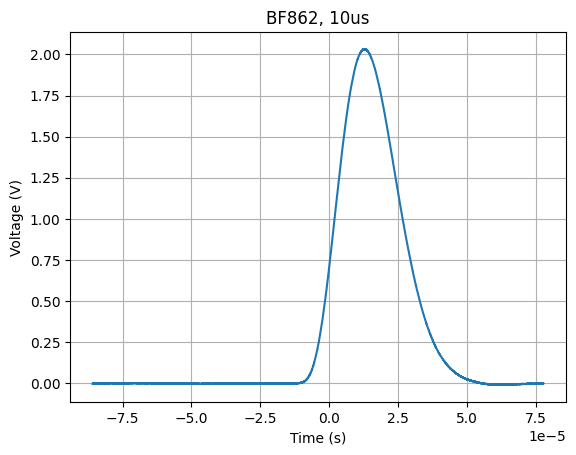

In [ ]:
plt.plot(time, chan_2)
plt.ylabel("Voltage (V)")
plt.xlabel("Time (s)")
plt.title("BF862, 10us")
plt.grid(True)

In [ ]:
max = 0
end = len(chan_2)

for index in range(0, end):
  if abs(chan_2[index]) > max:
    max = abs(chan_2[index])

print(max)

2.0332763439370307


real code

In [ ]:
for val in range(1, 3):
  temp_file = np.loadtxt("/content/drive/My Drive/charge_preamp_data/BF862/10 us/BF862_10us_SigOn_acq%d.csv" % (val),skiprows=10, delimiter=",",usecols=1)
  print(temp_file[0])

-0.0023852039924410207
0.0009856546727839977


(array([  1.,   8.,  24., 119., 224., 283., 241.,  74.,  21.,   5.]),
 array([2.00024193, 2.00573643, 2.01123093, 2.01672543, 2.02221993,
        2.02771443, 2.03320893, 2.03870343, 2.04419793, 2.04969243,
        2.05518693]),
 <a list of 10 Patch objects>)

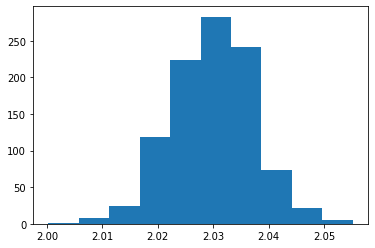

In [ ]:
# plotting gaussians for each shaping time

for val in range(1, 1001):
  temp_file = np.loadtxt("/content/drive/My Drive/charge_preamp_data/BF862/0.5 us/BF862_0.5us_SigOn_acq%d.csv" % (val),skiprows=10, delimiter=",",usecols=1)
  temp_max = 0
  for elem in temp_file:
    if elem > temp_max:
      temp_max = elem
  max_array.append(temp_max)

plt.hist(max_array)

In [ ]:
max_array = []

for jfet in ["CPH3910", "BF862", "2SK932", "2SK3557"]:
  for val in range(1, 1001):
    temp_file = np.loadtxt("/content/drive/My Drive/charge_preamp_data/%s/0.5 us/%s_0.5us_SigOn_acq%d.csv" % (jfet, jfet, val),skiprows=10, delimiter=",",usecols=1)
    temp_max = 0
    for elem in temp_file:
      if elem > temp_max:
        temp_max = elem
    max_array.append(temp_max)

#plt.hist(max_array[0, 1001], marker="o")
#plt.hist(max_array
#plt.title("0.5 us shaping time, CPH3910")
#plt.ylabel("Frequency")
#plt.xlabel("Peak values")

In [ ]:
max_array = []

for jfet in ["CPH3910", "BF862", "2SK932", "2SK3557"]:
  for val in range(1, 1001):
    temp_file = np.loadtxt("/content/drive/My Drive/charge_preamp_data/%s/10 us/%s_10us_SigOn_acq%d.csv" % (jfet, jfet, val),skiprows=10, delimiter=",",usecols=1)
    temp_max = 0
    for elem in temp_file:
      if elem > temp_max:
        temp_max = elem
    max_array.append(temp_max)

for cryo/non-cryo test only

In [ ]:
file_names = []
for val in range(1, 1001):
  if val >= 1 and val <= 9:
    file_names.append("000%d"%(val))
  elif val >= 10 and val <= 99:
    file_names.append("00%d" % (val))
  elif val >= 100 and val <=999:
    file_names.append("0%d"%(val))
  elif val == 1000:
    file_names.append(str(val))
  else:
    pass


In [ ]:
max_array = []

for val in file_names:
  temp_file = np.loadtxt("/content/drive/My Drive/2sk932 cryo/0.5 us/2SK932_0.5us_cryo_acq%s.csv" % (val),skiprows=10, delimiter=",",usecols=1)
  temp_max = 0
  for elem in temp_file:
    if elem > temp_max:
      temp_max = elem
  max_array.append(temp_max)

(array([  2.,  26.,  52., 174., 308., 259., 121.,  44.,   9.,   5.]),
 array([2.21117857, 2.2454265 , 2.27967442, 2.31392234, 2.34817027,
        2.38241819, 2.41666612, 2.45091404, 2.48516196, 2.51940989,
        2.55365781]),
 <a list of 10 Patch objects>)

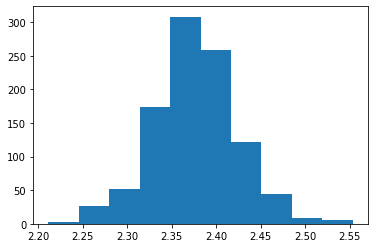

In [ ]:
plt.hist(max_array)

test code start



In [ ]:
with open('/content/drive/My Drive/0.5 us cryo.txt', 'w') as f:
    np.savetxt(f, max_array)

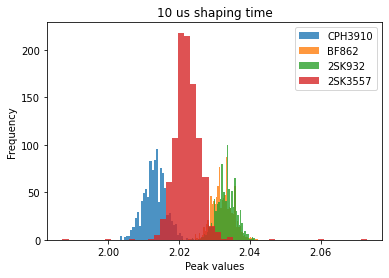

0.003220, 0.002934, 0.002765, 0.004159


In [ ]:
plt.hist(max_array[0:1001], alpha=0.8, label="CPH3910", bins=50)
plt.hist(max_array[1001:2001], alpha=0.8, label="BF862", bins=50)
plt.hist(max_array[2001:3001], alpha=0.8, label="2SK932", bins=50)
plt.hist(max_array[3001:4001], alpha=0.8, label="2SK3557", bins=50)
plt.title("10 us shaping time")
plt.legend()
plt.ylabel("Frequency")
plt.xlabel("Peak values")
plt.show()
print("%f, %f, %f, %f" % (stdev(max_array[0:1001], avg(max_array[0:1001])), stdev(max_array[1001:2001], avg(max_array[1001:2001])), stdev(max_array[2001:3001], avg(max_array[2001:3001])), stdev(max_array[3001:4001], avg(max_array[3001:4001]))))

In [ ]:
with open('/content/drive/My Drive/10 us.txt', 'w') as f:
    np.savetxt(f, max_array)

4000


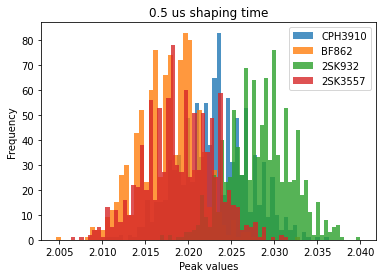

0.004065, 0.003489, 0.003640, 0.004045


In [ ]:
print(len(max_array))
#0.5 shaping time
low_array = max_array
plt.hist(low_array[0:1001], alpha=0.8, label="CPH3910", bins=50)
plt.hist(low_array[1001:2001], alpha=0.8, label="BF862", bins=50)
plt.hist(low_array[2001:3001], alpha=0.8, label="2SK932", bins=50)
plt.hist(low_array[3001:4001], alpha=0.8, label="2SK3557", bins=50)
plt.title("0.5 us shaping time")
plt.legend()
plt.ylabel("Frequency")
plt.xlabel("Peak values")
plt.show()

print("%f, %f, %f, %f" % (stdev(low_array[0:1001], avg(low_array[0:1001])), stdev(low_array[1001:2001], avg(low_array[1001:2001])), stdev(low_array[2001:3001], avg(low_array[2001:3001])), stdev(low_array[3001:4001], avg(low_array[3001:4001]))))

In [ ]:
# Conversion from V to energy (from JC's code)

V_in = 0.012 # need to check this
E_Ar = 25
C_in = 4e-12

trans = (E_Ar/(1.6e-19))*C_in*(V_in/1000) # v to E
V_T = trans/max(max_array)
FWHM = RMS(max_array, avg(max_array)) * 2.35 * V_T
print("%f keV" % (FWHM))

NameError: ignored

4000


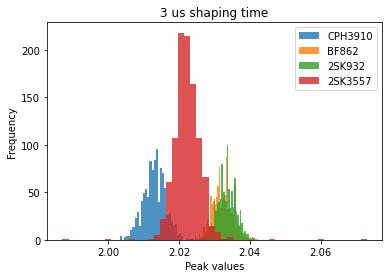

0.003220, 0.002934, 0.002765, 0.004159


In [ ]:
print(len(max_array))
mid_array = max_array
plt.hist(mid_array[0:1001], alpha=0.8, label="CPH3910", bins=50)
plt.hist(mid_array[1001:2001], alpha=0.8, label="BF862", bins=50)
plt.hist(mid_array[2001:3001], alpha=0.8, label="2SK932", bins=50)
plt.hist(mid_array[3001:4001], alpha=0.8, label="2SK3557", bins=50)
plt.title("3 us shaping time")
plt.legend()
plt.ylabel("Frequency")
plt.xlabel("Peak values")
plt.show()
print("%f, %f, %f, %f" % (stdev(mid_array[0:1001], avg(mid_array[0:1001])), stdev(mid_array[1001:2001], avg(mid_array[1001:2001])), stdev(mid_array[2001:3001], avg(mid_array[2001:3001])), stdev(mid_array[3001:4001], avg(mid_array[3001:4001]))))

test code end


main analysis here

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
def Gaussian(x, A, mean, std):
  gauss = A*np.exp(-(x-mean)**2/(2*std**2))
  return gauss

In [ ]:
ten_us = np.loadtxt("/content/drive/My Drive/10 us cryo.txt")
six_us = np.loadtxt("/content/drive/My Drive/6 us cryo.txt")
three_us = np.loadtxt("/content/drive/My Drive/3 us cryo.txt")
two_us = np.loadtxt("/content/drive/My Drive/2 us cryo.txt")
one_us = np.loadtxt("/content/drive/My Drive/1 us cryo.txt")
point_five_us = np.loadtxt("/content/drive/My Drive/0.5 us cryo.txt")

In [ ]:
def VtoE(array):
  """Takes V values and turns it into E values"""
  new=[]
  for val in array:
    temp = (val*3.75*1000)
    new.append(temp)
  return(new)

def std_to_fwhm(array):
  new=[]
  for val in array:
    temp=val*2.35
    new.append(temp)
  return new

In [ ]:
E = 0.012*5.6e-12*25/(1.6e-19)
print("Expected -> 2V = %f eV"%(E))
print("1 V -> %f MeV"%(E/2e6))
inc = (5.25-3.75)*100/3.75
print("%f percent increase in cryo"%(inc))

Expected -> 2V = 10500000.000000 eV
1 V -> 5.250000 MeV
40.000000 percent increase in cryo


In [ ]:
# 0.5 pF capacitance, 1 MeV deposition, then output gain = 10, how many volts?


In [ ]:
def VtoEcryo(array):
  """Takes V values and turns it into E values in keV"""
  new=[]
  for val in array:
    temp = (val*5.25*1000)
    new.append(temp)
  return(new)

In [ ]:
avg(point_five_us)

2.376115023277503

[ 9600.          9633.89830508  9667.79661017  9701.69491525
  9735.59322034  9769.49152542  9803.38983051  9837.28813559
  9871.18644068  9905.08474576  9938.98305085  9972.88135593
 10006.77966102 10040.6779661  10074.57627119 10108.47457627
 10142.37288136 10176.27118644 10210.16949153 10244.06779661
 10277.96610169 10311.86440678 10345.76271186 10379.66101695
 10413.55932203 10447.45762712 10481.3559322  10515.25423729
 10549.15254237 10583.05084746 10616.94915254 10650.84745763
 10684.74576271 10718.6440678  10752.54237288 10786.44067797
 10820.33898305 10854.23728814 10888.13559322 10922.03389831
 10955.93220339 10989.83050847 11023.72881356 11057.62711864
 11091.52542373 11125.42372881 11159.3220339  11193.22033898
 11227.11864407 11261.01694915 11294.91525424 11328.81355932
 11362.71186441 11396.61016949 11430.50847458 11464.40677966
 11498.30508475 11532.20338983 11566.10169492 11600.        ]


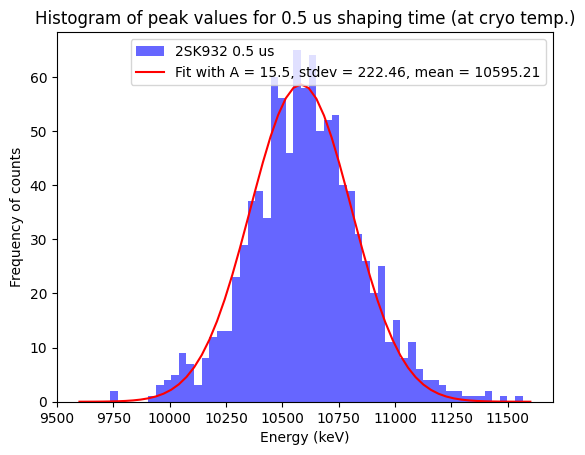

In [ ]:
center = 2.02

def move_center(array):
  new = []
  diff = avg(array) - center
  for val in array:
    diff_var = val - diff
    new.append(diff_var)
  return new

E1 = VtoEcryo(move_center(point_five_us))
E2 = VtoEcryo(move_center(one_us))
E3 = VtoEcryo(move_center(two_us))
E4 = VtoEcryo(move_center(three_us))
E5 = VtoEcryo(move_center(six_us))
E6 = VtoEcryo(move_center(ten_us))

bin=np.linspace(9600, 11600, 60)
#plt.plot(bin, Gaussian(avg(move_center(ten_us[0:1001])), stdev(move_center(ten_us[0:1001]), avg(move_center(ten_us[0:1001]))), x=bin), color="blue", label="CPH fit")
#plt.plot(bin, Gaussian(avg(move_center(ten_us[1001:2001])), stdev(move_center(ten_us[1001:2001]), avg(move_center(ten_us[1001:2001]))), x=bin), color="orange",label="BF fit")
#plt.plot(bin, Gaussian(avg(move_center(ten_us[2001:3001])), stdev(move_center(ten_us[2001:3001]), avg(move_center(ten_us[2001:3001]))), x=bin), color="green", label="2SK932 fit")
#plt.plot(bin, Gaussian(avg(move_center(ten_us[3001:4001])), stdev(move_center(ten_us[3001:4001]), avg(move_center(ten_us[3001:4001]))), x=bin), color="red",label="2SK3557 fit")
n1, b1, p1 = plt.hist(E1, label="2SK932 0.5 us", bins=bin, alpha=0.6, color="blue") # 2nd widest
#n2, b2, p2 = plt.hist(E2, label="2SK932 1 us", bins=bin, alpha=0.7, color="orange") # 3rd widest
#plt.hist(E3, label="2SK932 2 us", bins=bin, alpha=0.6, color="green") #narrowest
#plt.hist(E4, label="2SK932 3 us", bins=bin, alpha=0.5, color="red") #widest
#plt.hist(E5, label="2SK932 6 us", bins=bin, alpha=0.5)
#plt.hist(E6, label="2SK932 10 us", bins=bin, alpha=0.5)
plt.ylabel("Frequency of counts")
plt.xlabel("Energy (keV)")
plt.title("Histogram of peak values for 0.5 us shaping time (at cryo temp.)")

x_axis = bin[0:59]
popt, pcov = curve_fit(Gaussian, x_axis, n1, p0=[60, avg(E1), stdev(E1, avg(E1))])

plt.plot(bin, Gaussian(bin, popt[0], popt[1], popt[2]), color="red", label="Fit with A = 15.5, stdev = 222.46, mean = 10595.21")
plt.legend()

print(b1)

In [ ]:
x_axis = bin[0:129]
print(len(x_axis))
print(len(n1))
popt, pcov = curve_fit(Gaussian, x_axis, n1, p0=[25, 10600, stdev(E1, avg(E1))])
print(popt)

129
129
[   26.79161203 10591.2971933    225.0795813 ]


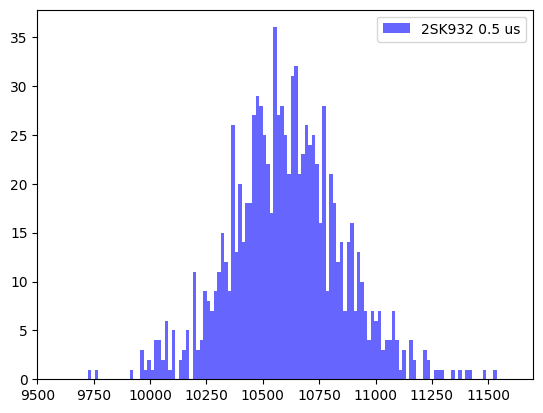

In [ ]:
bin=np.linspace(9600, 11600, 130)
n, b, p = plt.hist(E1, label="2SK932 0.5 us", bins=bin, alpha=0.6, color="blue")
#plt.plot(bin, Gaussian(bin, 15.49941751, 10595.21321923, 222.47587015), color="red", label="Fit with A = 23.30, stdev = 138.09, mean = 10604.62")
plt.legend()

In [ ]:
print(p2)

<BarContainer object of 159 artists>


In [ ]:
x_axis = bin[0:len(n)]
popt, pcov = curve_fit(Gaussian, x_axis, n, p0=[30, avg(E1), stdev(E1, avg(E1))])
print(popt)

[   26.79163732 10591.29705193   225.0791566 ]


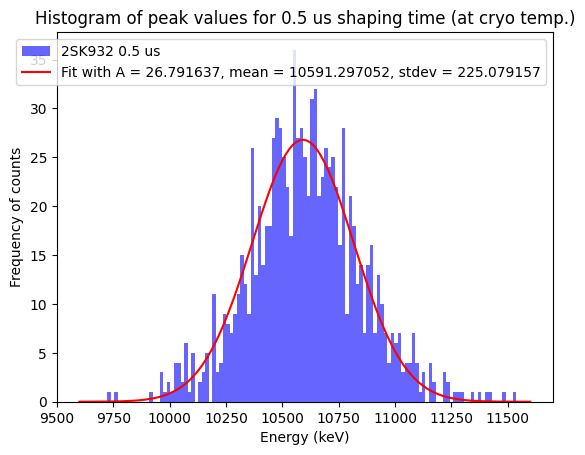

In [ ]:
n, b, p = plt.hist(E1, label="2SK932 0.5 us", bins=bin, alpha=0.6, color="blue")
plt.title("Histogram of peak values for 0.5 us shaping time (at cryo temp.)")
plt.xlabel("Energy (keV)")
plt.ylabel("Frequency of counts")
plt.plot(bin, Gaussian(bin, popt[0], popt[1], popt[2]), color="red", label="Fit with A = %f, mean = %f, stdev = %f" % (popt[0], popt[1], popt[2]))
plt.legend()

Text(0.5, 1.0, 'FWHM for 2SK932 shaping times in LN2')

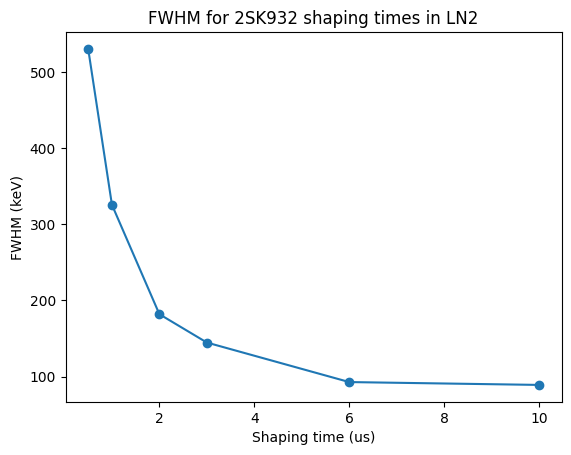

In [ ]:
stdev_array = [225.08, 138.241, 77.264, 61.474, 39.454, 37.864]
fwhm_array = []
factor = 2*np.sqrt(2*np.log(2))
for val in stdev_array:
  fwhm_array.append(val*factor)
times = [0.5, 1, 2, 3, 6, 10]
plt.plot(times, fwhm_array, marker="o")
plt.xlabel("Shaping time (us)")
plt.ylabel("FWHM (keV)")
plt.title("FWHM for 2SK932 shaping times in LN2")

In [ ]:
popt2, pcov2 = curve_fit(Gaussian, x_axis, )

In [ ]:
import scipy.signal as sig
import scipy.stats as st

In [ ]:
print(st.norm.fit(E1))
print(stdev(E1, avg(E1)))

(7575.00000000001, 40.75294490653417)
40.77333667408821


In [ ]:
array1 = np.array([VtoEcryo(point_five_us), VtoEcryo(one_us), VtoEcryo(two_us), VtoEcryo(three_us), VtoEcryo(six_us), VtoEcryo(ten_us)])

In [ ]:
std1 = []
for val in array1:
  std1.append(st.norm.fit(val)[1])

In [ ]:
print(std1)

[247.99131443376558, 143.33325436354335, 115.79618856510396, 61.965106877139576, 51.91072060233029, 57.05412286914783]


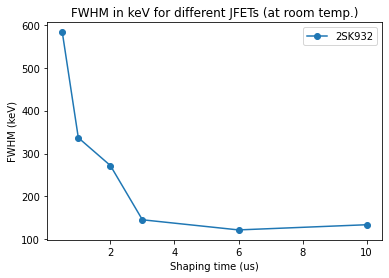

In [ ]:
E1 = array1
std1 = np.array([st.norm.fit(E1[0])[1], st.norm.fit(E1[1])[1], st.norm.fit(E1[2])[1], st.norm.fit(E1[3])[1], st.norm.fit(E1[4])[1], st.norm.fit(E1[5])[1]])
fwhm1 = std_to_fwhm(std1)
time = [0.5, 1, 2, 3, 6, 10]
plt.plot(time, fwhm1, marker="o", label="2SK932")

plt.legend()
plt.xlabel("Shaping time (us)")
plt.ylabel("FWHM (keV)")

plt.title("FWHM in keV for different JFETs (at cryo temp.)")
plt.show()

other analysis

[28.1349161  21.36055415 16.14780966 15.24400571 13.72775926 12.07400889] [27.77752599 18.73114053 14.67050423 13.08396834 11.31004921 11.00321815] [26.60772354 18.02036694 14.66846659 13.65095914 11.19061256 10.36932693] [29.4252606  21.0118352  16.88869628 15.16713399 13.49875478 15.59471635]


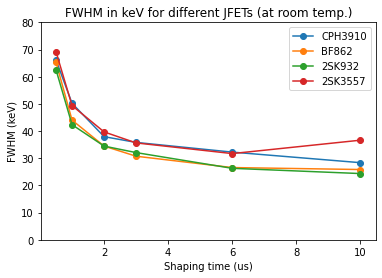

In [ ]:
# 2V -> 7.5 MeV
# 1V -> 7.5/2 MeV -> 3.75 MeV
#CPH3910
array1 = np.array([point_five_us[0:1001], one_us[0:1001], two_us[0:1001], three_us[0:1001], six_us[0:1001], ten_us[0:1001]])
#bf862
array2 = np.array([point_five_us[1001:2001], one_us[1001:2001], two_us[1001:2001], three_us[1001:2001], six_us[1001:2001], ten_us[1001:2001]])
# 2sk932
array3 = np.array([point_five_us[2001:3001], one_us[2001:3001], two_us[2001:3001], three_us[2001:3001], six_us[2001:3001], ten_us[2001:3001]])
#2sk3557
array4 = np.array([point_five_us[3001:4001], one_us[3001:4001], two_us[3001:4001], three_us[3001:4001], six_us[3001:4001], ten_us[3001:4001]])

E1 = VtoE(array1)
E2 = VtoE(array2)
E3 = VtoE(array3)
E4 = VtoE(array4)

std1 = np.array([stdev(E1[0], avg(E1[0])), stdev(E1[1], avg(E1[1])), stdev(E1[2], avg(E1[2])), stdev(E1[3], avg(E1[3])), stdev(E1[4], avg(E1[4])), stdev(E1[5], avg(E1[5]))])
std2 = np.array([stdev(E2[0], avg(E2[0])), stdev(E2[1], avg(E2[1])), stdev(E2[2], avg(E2[2])), stdev(E2[3], avg(E2[3])), stdev(E2[4], avg(E2[4])), stdev(E2[5], avg(E2[5]))])
std3 = np.array([stdev(E3[0], avg(E3[0])), stdev(E3[1], avg(E3[1])), stdev(E3[2], avg(E3[2])), stdev(E3[3], avg(E3[3])), stdev(E3[4], avg(E3[4])), stdev(E3[5], avg(E3[5]))])
std4 = np.array([stdev(E4[0], avg(E4[0])), stdev(E4[1], avg(E4[1])), stdev(E4[2], avg(E4[2])), stdev(E4[3], avg(E4[3])), stdev(E4[4], avg(E4[4])), stdev(E4[5], avg(E4[5]))])

print(std1, std2, std3, std4)
#convert to fwhm
fwhm1 = std_to_fwhm(std1)
fwhm2 = std_to_fwhm(std2)
fwhm3 = std_to_fwhm(std3)
fwhm4 = std_to_fwhm(std4)

time = [0.5, 1, 2, 3, 6, 10]

plt.plot(time, fwhm1, marker="o", label="CPH3910")
plt.plot(time, fwhm2, marker="o", label="BF862")
plt.plot(time, fwhm3, marker="o", label="2SK932")
plt.plot(time, fwhm4, marker="o", label="2SK3557")
plt.legend()
plt.xlabel("Shaping time (us)")
plt.ylabel("FWHM (keV)")

plt.ylim(0, 80)
plt.title("FWHM in keV for different JFETs (at room temp.)")
plt.show()

In [ ]:
print(fwhm1)
print(fwhm2)
print(fwhm3)
print(fwhm4)

[66.11705284439417, 50.19730225335048, 37.94735269481186, 35.82341341959324, 32.26023426547951, 28.37392090287298]
[65.27718607640232, 44.01818025411589, 34.47568493479914, 30.747325600749132, 26.578615647830752, 25.857562656591067]
[62.5281503252283, 42.34786230484068, 34.470896495983034, 32.079753968090955, 26.297939516288597, 24.367918286345454]
[69.14936240982458, 49.37781272776744, 39.688436253945476, 35.64276487108095, 31.722073734650955, 36.647583424867236]


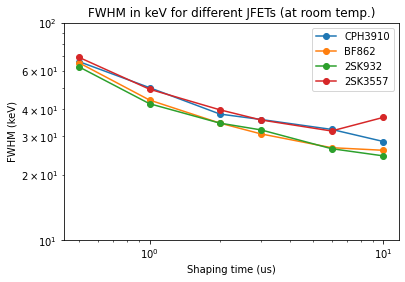

In [ ]:
time = [0.5, 1, 2, 3, 6, 10]
plt.plot(time, fwhm1, marker="o", label="CPH3910")
plt.plot(time, fwhm2, marker="o", label="BF862")
plt.plot(time, fwhm3, marker="o", label="2SK932")
plt.plot(time, fwhm4, marker="o", label="2SK3557")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.xlabel("Shaping time (us)")
plt.ylabel("FWHM (keV)")
plt.ylim([10, 100])
plt.title("FWHM in keV for different JFETs (at room temp.)")
plt.show()

main analysis ends here

test block

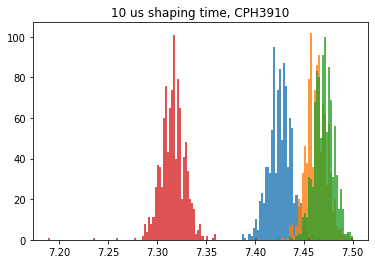

In [ ]:
max_array = [max(VtoEset(ten_us[0:1001])), max(VtoEset(ten_us[1001:2001])), max(VtoEset(ten_us[2001:3001])), max(VtoEset(ten_us[3001:4001]))]
min_array = [min(VtoEset(ten_us[0:1001])), min(VtoEset(ten_us[1001:2001])), min(VtoEset(ten_us[2001:3001])), min(VtoEset(ten_us[3001:4001]))]
bin = np.linspace(min(min_array), max(max_array), num=150)

plt.title("10 us shaping time, CPH3910")

plt.hist(VtoEset(ten_us[0:1001]), bins=bin, alpha=0.8)
plt.hist(VtoEset(ten_us[1001:2001]), bins=bin, alpha=0.8)
plt.hist(VtoEset(ten_us[2001:3001]), bins=bin, alpha=0.8)
plt.hist(VtoEset(ten_us[3001:4001]), bins=bin, alpha=0.8)
plt.show()

not sure how to center these without distorting the original mean energy values

\test block


In [ ]:
plt.hist()

old code

Text(0.5, 1.0, 'FWHM of several JFETs with shaping time')

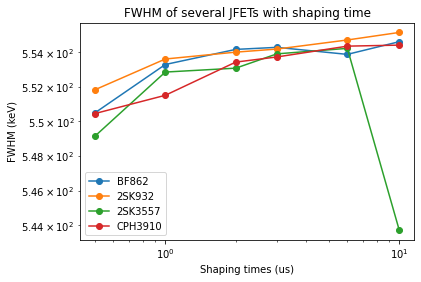

In [ ]:
#[10, 6, 3, 2, 1, 0.5]
BF862 = [554.62, 553.88, 554.29, 554.17, 553.29, 550.48]
#2SK932
SK932 = [555.16, 554.72, 554.19, 554.01, 553.61, 551.82]
#2SK3557
SK3557 = [543.73, 554.23, 553.91, 553.077, 552.85, 549.13]
#CPH3910
CPH3910 = [554.42, 554.36, 553.73, 553.43, 551.50, 550.44]
times = [10, 6, 3, 2, 1, 0.5]
plt.plot(times, BF862, label="BF862", marker = "o")
plt.plot(times, SK932, label="2SK932", marker = "o")
plt.plot(times, SK3557, label="2SK3557", marker = "o")
plt.plot(times, CPH3910, label="CPH3910", marker = "o")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Shaping times (us)")
plt.ylabel("FWHM (keV)")
plt.title("FWHM of several JFETs with shaping time")

Measuring charge pre-amp signals